In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset

In [7]:
df = pd.read_csv('data.csv')

In [8]:
print("First 5 rows of the dataset:")

First 5 rows of the dataset:


In [9]:
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [10]:
print("\nInformation about the dataset:")


Information about the dataset:


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


# Step 2: Preprocess the data (scaling)

In [12]:
numerical_cols = ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']

In [13]:
missing_cols = [col for col in numerical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: The following numerical columns were not found in the dataset: {missing_cols}")
    # Filter to only include columns that are actually in the DataFrame
    numerical_cols = [col for col in numerical_cols if col in df.columns]


In [14]:
if not numerical_cols:
    raise ValueError("No suitable numerical columns found for clustering after initial selection. Please check the dataset columns.")

In [15]:
X = df[numerical_cols]

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
print("\nData scaled successfully.")


Data scaled successfully.


# Step 3: Apply K-Means clustering and determine optimal K (Elbow Method)

In [19]:
inertia = []
range_k = range(1, 11)

In [20]:
for k in range_k:
    # Initialize KMeans with n_init to suppress warning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

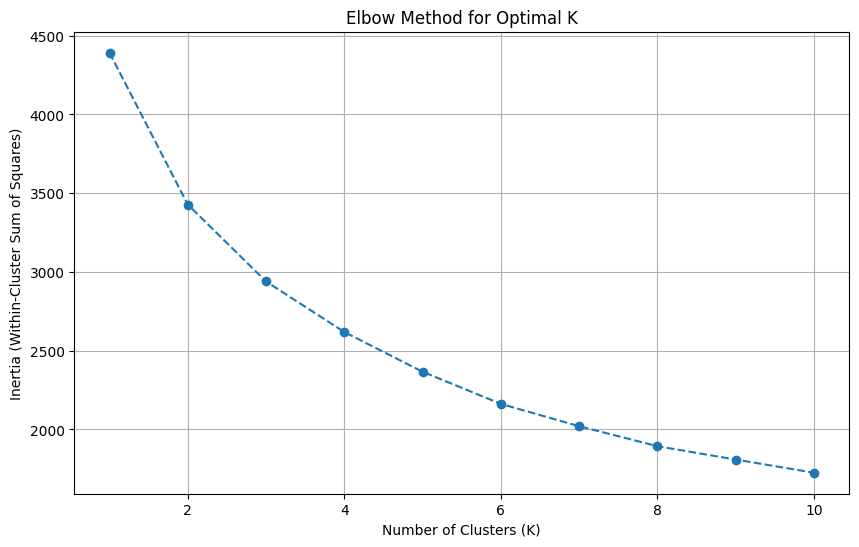


Elbow Method plot displayed. Look for the 'elbow' point to determine optimal K.


In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()
print("\nElbow Method plot displayed. Look for the 'elbow' point to determine optimal K.")

# Step 4: Apply K-Means clustering with the chosen optimal K

In [22]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [23]:
df['Cluster'] = clusters
print(f"\nK-Means clustering applied with K={optimal_k}. Cluster assignments added to DataFrame.")


K-Means clustering applied with K=3. Cluster assignments added to DataFrame.


# Step 5: Visualize clusters using 2D scatter plots

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [25]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

In [26]:
if 'Sentiment' in df.columns:
    pca_df['Sentiment'] = df['Sentiment']

<Axes: xlabel='PC1', ylabel='PC2'>

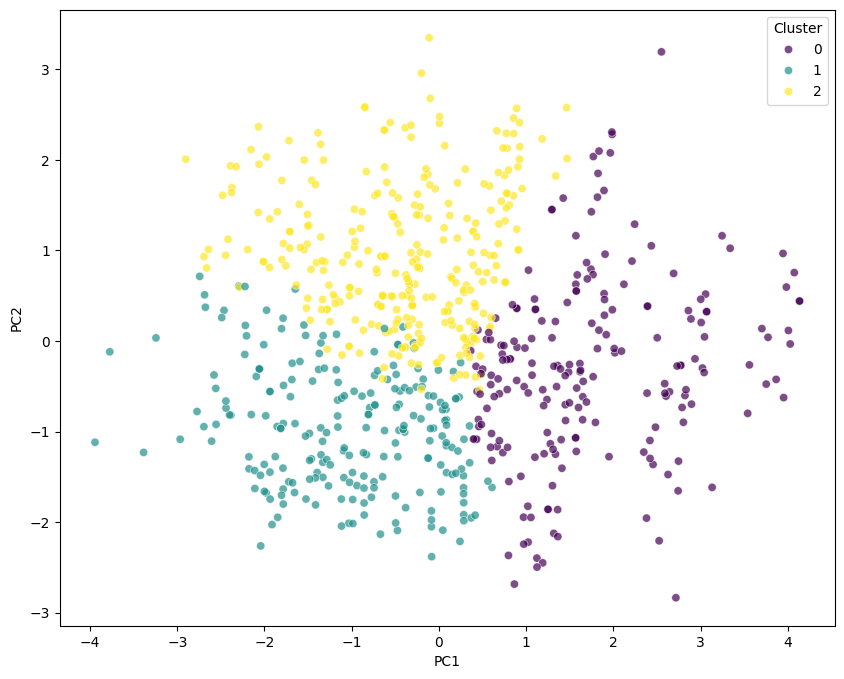

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis', # A color palette for clusters
    data=pca_df,
    legend='full',
    alpha=0.7
)

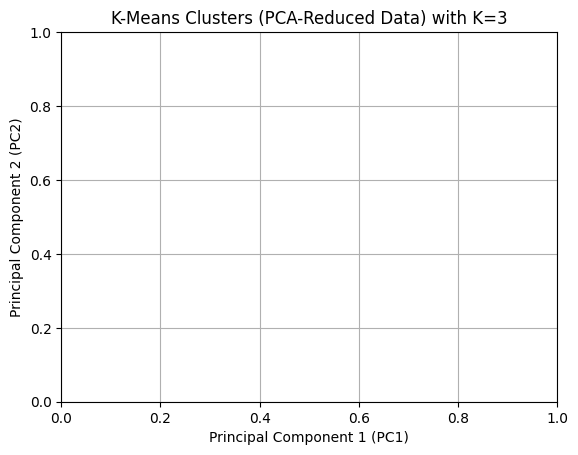


2D Scatter plot of clusters displayed.


In [28]:
plt.title(f'K-Means Clusters (PCA-Reduced Data) with K={optimal_k}')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()
print("\n2D Scatter plot of clusters displayed.")

# Step 6: Interpret the clustering results

In [29]:
cluster_analysis = df.groupby('Cluster')[numerical_cols].mean()
print("\nMean values of numerical features per cluster:")
print(cluster_analysis)


Mean values of numerical features per cluster:
          Retweets      Likes         Year     Month        Day       Hour
Cluster                                                                   
0        30.233010  60.150485  2020.334951  6.126214  15.330097  16.796117
1        17.684444  35.440000  2021.973333  2.711111  17.320000  13.751111
2        18.395349  36.674419  2019.441860  8.671096  14.249169  15.973422


In [30]:
if 'Sentiment' in df.columns:
    sentiment_distribution = df.groupby('Cluster')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0)
    print("\nSentiment distribution (normalized) within each cluster:")
    print(sentiment_distribution)


Sentiment distribution (normalized) within each cluster:
Sentiment  Acceptance     Acceptance        Accomplishment   Admiration   \
Cluster                                                                    
0               0.000000          0.000000         0.009709     0.000000   
1               0.013333          0.013333         0.004444     0.000000   
2               0.000000          0.006645         0.000000     0.003322   

Sentiment  Admiration     Admiration      Adoration      Adrenaline       \
Cluster                                                                    
0               0.000000        0.004854       0.000000         0.000000   
1               0.008889        0.000000       0.008889         0.000000   
2               0.000000        0.000000       0.000000         0.003322   

Sentiment  Adventure   Affection      ...  Vibrancy   Whimsy          \
Cluster                               ...                              
0            0.009709       0.000000

In [31]:
print("\nClustering analysis complete. Review the mean feature values and sentiment distribution for interpretation.")


Clustering analysis complete. Review the mean feature values and sentiment distribution for interpretation.
